In [1]:
import pandas as pd

df = pd.read_csv('data/mq_variants_intensity_deduction.csv')
df.head()

,Variant,Variant ID,Unmod variant,Total,Total- Unmodified sequence,Variants- Unmodified sequence,Proteins,Mass,Charge,Num Mods,...,_dyn_#Barasertib_HQPA DMSO.Tech replicate 1 of 1,_dyn_#Baricitinib 1000nM.Tech replicate 1 of 1,_dyn_#Baricitinib 100nM.Tech replicate 1 of 1,_dyn_#Baricitinib 10nM.Tech replicate 1 of 1,_dyn_#Baricitinib 30000nM.Tech replicate 1 of 1,_dyn_#Baricitinib 3000nM.Tech replicate 1 of 1,_dyn_#Baricitinib 300nM.Tech replicate 1 of 1,_dyn_#Baricitinib 30nM.Tech replicate 1 of 1,_dyn_#Baricitinib 3nM.Tech replicate 1 of 1,_dyn_#Baricitinib DMSO.Tech replicate 1 of 1
0,.VADPDHDHTGFLTEYVATR.,93378,.VADPDHDHTGFLTEYVATR.,11372,15019,62,sp|P28482-2|MK01_HUMAN;sp|P28482|MK01_HUMAN,2144.0,2,0,...,0,-185697000.0,175740000.0,86480000.0,-158417000.0,-170705000.0,-72050000.0,41480000.0,18030000.0,0
1,.LGEHNIDVLEGNEQFINAAK.,50733,.LGEHNIDVLEGNEQFINAAK.,8878,23098,134,TRYP_PIG,2211.1,2,0,...,0,-205020000.0,17010000.0,24180000.0,-189360000.0,-222205000.0,-160380000.0,400000.0,-125690000.0,0
2,.FRHENIIGINDIIR.,25741,.FRHENIIGINDIIR.,8720,12619,33,sp|P28482-2|MK01_HUMAN;sp|P28482|MK01_HUMAN,1709.9,2,0,...,0,-163327000.0,-26840000.0,100740000.0,-146002000.0,-123770000.0,-121370000.0,-13070000.0,-53640000.0,0
3,.ESESTAGSFSLSVR.,21292,.ESESTAGSFSLSVR.,7995,8328,7,sp|P06239-2|LCK_HUMAN;sp|P06239-3|LCK_HUMAN;sp...,1456.7,2,0,...,0,-1715000.0,2226000.0,5429000.0,545000.0,1445000.0,6385000.0,-1619000.0,-114000.0,0
4,.NYLLSLPHK.,68115,.NYLLSLPHK.,7445,11842,41,sp|P28482|MK01_HUMAN,1084.6,2,0,...,0,187853000.0,437533000.0,547423000.0,206403000.0,257283000.0,247273000.0,433603000.0,319443000.0,0


In [14]:
import numpy as np
import seaborn as sns
import re

import matplotlib.pyplot as plt
# create a heat graph with y column: all posible modifications in df, x column the  drug treatement and the color the intensity of count appearance for each modification
# modifications is ddfined by the letter + the number, foexample, .DVYIVQDLM+15.995ETDLYK. here modification is M+15.995

# Step 1: Extract all the modifications from the 'Variant' column
def extract_modifications(variant):
    mods = []
    pattern = r'([A-Z]\+[0-9]+\.[0-9]+)'
    matches = re.findall(pattern, variant)
    for match in matches:
        mods.append(match)
    return mods

# Extract all modifications
all_mods = []
for variant in df['Variant']:
    mods = extract_modifications(variant)
    if mods:
        all_mods.extend(mods)

# Get unique modifications
unique_mods = sorted(list(set(all_mods)))

# Step 2: Count occurrence of each modification for each drug treatment
# Get all drug treatment columns
drug_columns = [col for col in df.columns if col.startswith('_dyn_#')]

# Create empty DataFrame to store the counts
heatmap_data = pd.DataFrame(0, index=unique_mods, columns=drug_columns)

# Count modifications for each drug treatment
for _, row in df.iterrows():
    mods = extract_modifications(row['Variant'])
    if not mods:
        continue
    
    for mod in mods:
        for drug_col in drug_columns:
            # Check if the data is numeric and not NaN
            if pd.notna(row[drug_col]) and row[drug_col] != 0:
                # Add 1 to count if the value is present (non-zero)
                heatmap_data.loc[mod, drug_col] += row[drug_col]

# Clean up drug names for better display
heatmap_data.columns = [col.replace('_dyn_#', '').replace('.Tech replicate 1 of 1', '') for col in heatmap_data.columns]

# Sort modifications by frequency
mod_frequency = heatmap_data.sum(axis=1)
heatmap_data = heatmap_data.loc[mod_frequency.sort_values(ascending=False).index]


In [15]:
print(heatmap_data.head())
heatmap_data.to_csv('data/heatmap_data.csv')

          AEE-788_inBT474 1000nM  AEE-788_inBT474 100nM  AEE-788_inBT474 10nM  AEE-788_inBT474 30000nM  AEE-788_inBT474 3000nM  AEE-788_inBT474 300nM  AEE-788_inBT474 30nM  AEE-788_inBT474 3nM  AEE-788_inBT474 DMSO  AEW-541 1000nM  AEW-541 100nM  AEW-541 10nM  AEW-541 30000nM  AEW-541 3000nM  AEW-541 300nM  AEW-541 30nM  AEW-541 3nM  AEW-541 DMSO  AMG-208 1000nM  AMG-208 100nM  AMG-208 10nM  AMG-208 30000nM  AMG-208 3000nM  AMG-208 300nM  AMG-208 30nM  AMG-208 3nM  AMG-208 DMSO  AMG-208_withCAKI 1000nM  AMG-208_withCAKI 100nM  AMG-208_withCAKI 10nM  AMG-208_withCAKI 30000nM  AMG-208_withCAKI 3000nM  AMG-208_withCAKI 300nM  AMG-208_withCAKI 30nM  AMG-208_withCAKI 3nM  AMG-208_withCAKI DMSO  AMG-900 1000nM  AMG-900 100nM  AMG-900 10nM  AMG-900 30000nM  AMG-900 3000nM  AMG-900 300nM  AMG-900 30nM  AMG-900 3nM  AMG-900 DMSO  ARRY-380 1000nM  ARRY-380 100nM  ARRY-380 10nM  ARRY-380 30000nM  ARRY-380 3000nM  ...  BMS-911543 3000nM  BMS-911543 300nM  BMS-911543 30nM  BMS-911543 3nM  \
C+57.02

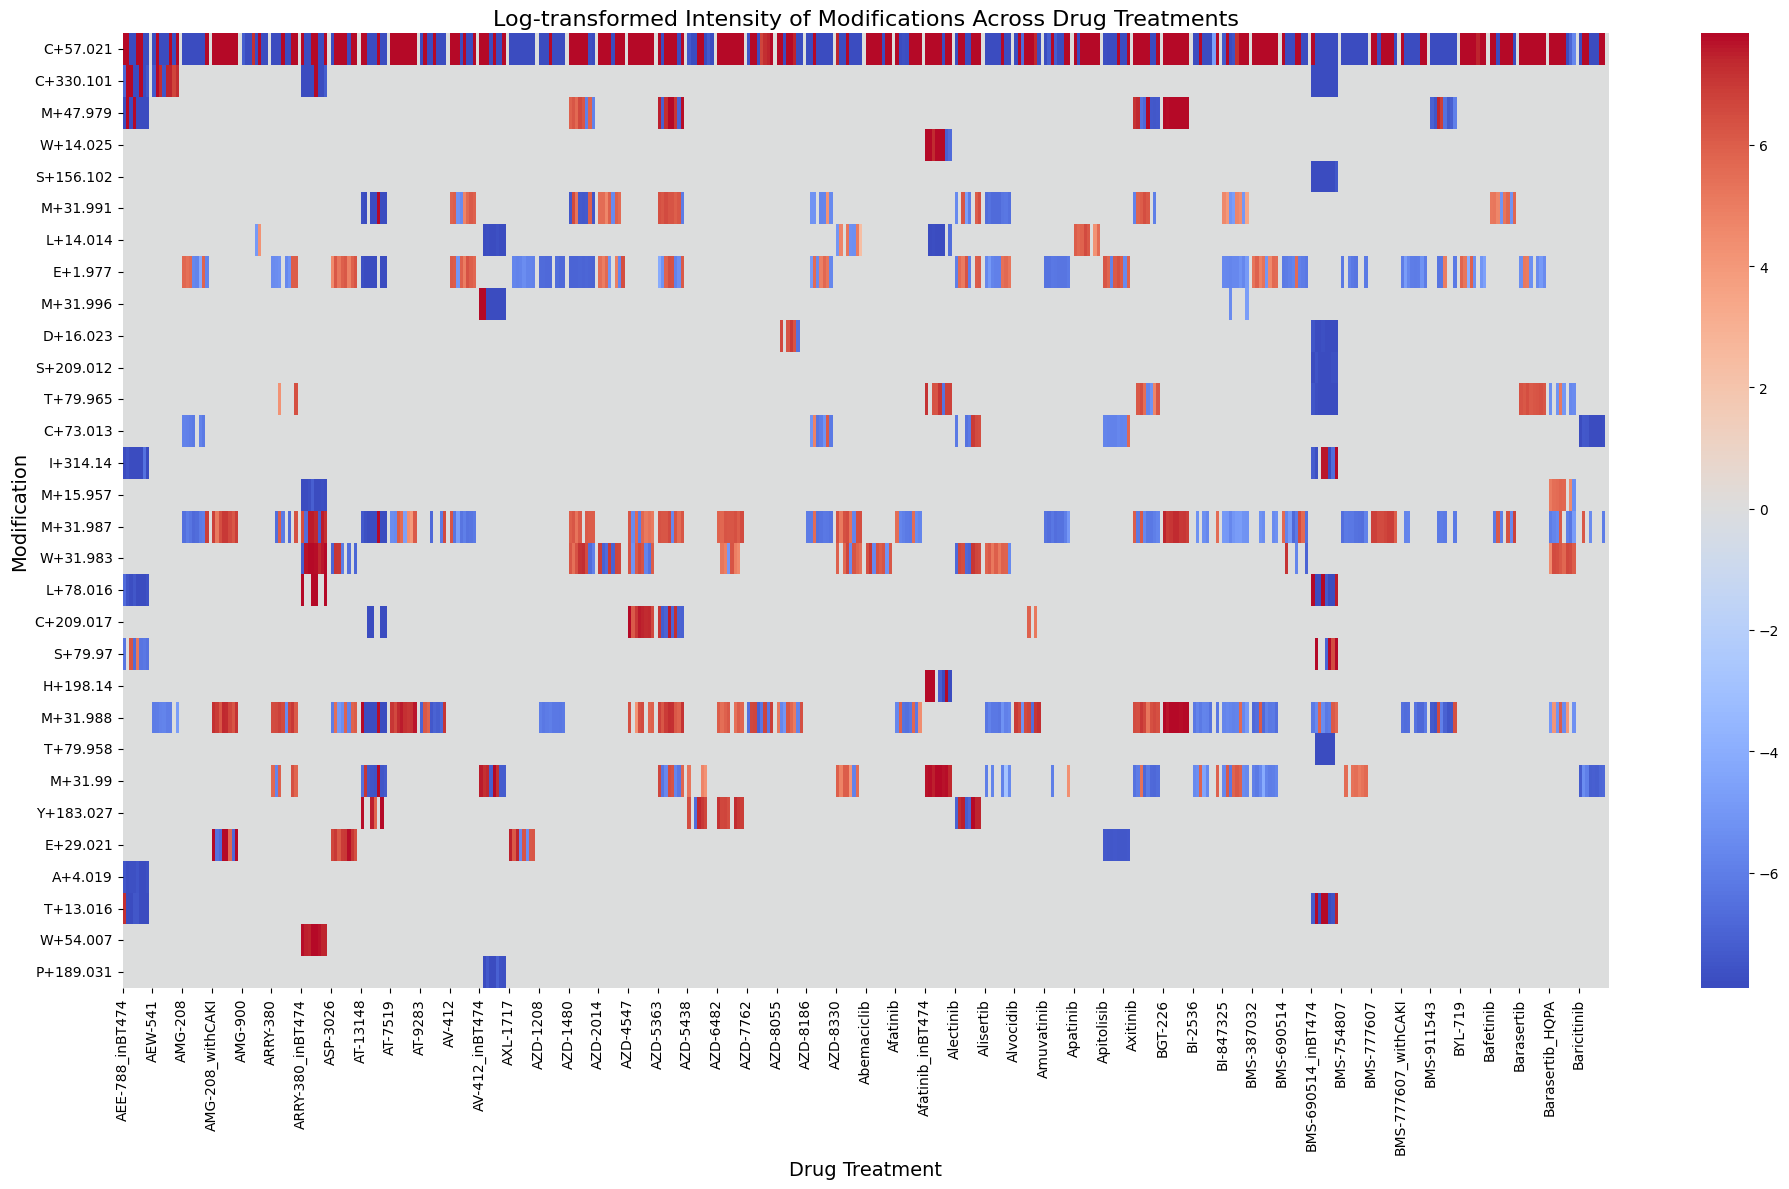

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 30 modifications based on total intensity
top_n = 30
top_mod_indices = mod_frequency.abs().sort_values(ascending=False).head(top_n).index
top_mods = heatmap_data.loc[top_mod_indices].copy()

# Apply log transformation with sign preservation
def log_transform_with_sign(value):
    if np.isclose(value, 0):
        return 0
    return np.sign(value) * np.log10(abs(value) + 1)  # +1 to avoid log(0)

# Apply the transformation to each value in the DataFrame
log_data = top_mods.applymap(log_transform_with_sign)

# Extract generic drug names (removing concentrations and tech replicate info)
generic_drug_names = []
seen_drugs = set()
drug_positions = []
pos = 0

for col in log_data.columns:
    # Extract the drug name by getting everything before the first space
    drug_name = col.split(' ')[0]
    if drug_name not in seen_drugs:
        seen_drugs.add(drug_name)
        generic_drug_names.append(drug_name)
        drug_positions.append(pos)
    pos += 1

# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# Draw the heatmap with a diverging colormap
sns.heatmap(log_data, 
            cmap="coolwarm",
            center=0,
            robust=True,
            xticklabels=False,
            yticklabels=True)

plt.title('Log-transformed Intensity of Modifications Across Drug Treatments', fontsize=16)
plt.xlabel('Drug Treatment', fontsize=14)
plt.ylabel('Modification', fontsize=14)

# Set custom x-ticks at the middle position for each drug group
plt.xticks(drug_positions, generic_drug_names, rotation=90)
plt.tight_layout()
plt.show()

In [19]:
print(log_data.head())

           AEE-788_inBT474 1000nM  AEE-788_inBT474 100nM  \
C+57.021                10.127579               9.957899   
C+330.101               -6.903090               8.931305   
M+47.979                -9.031174               8.362671   
W+14.025                 0.000000               0.000000   
S+156.102                0.000000               0.000000   

           AEE-788_inBT474 10nM  AEE-788_inBT474 30000nM  \
C+57.021              -9.045273                -9.963708   
C+330.101              8.247237                -8.700531   
M+47.979              -9.054969                 8.474799   
W+14.025               0.000000                 0.000000   
S+156.102              0.000000                 0.000000   

           AEE-788_inBT474 3000nM  AEE-788_inBT474 300nM  \
C+57.021                10.359699               9.998898   
C+330.101               -8.475671               8.577722   
M+47.979                -7.795880              -8.020775   
W+14.025                 0.000000     